In [3]:
import gpflow
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 6)
import matplotlib.pyplot as plt
import numpy as np

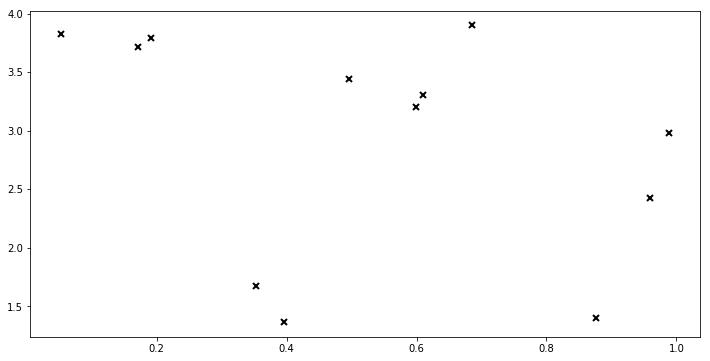

In [4]:
N = 12
X = np.random.rand(N, 1)
Y = np.sin(12 * X) + 0.66 * np.cos(25 * X) + np.random.randn(N, 1) * 0.1 + 3
plt.plot(X, Y, 'kx', mew=2)

In [5]:
k = gpflow.kernels.Matern52(1, lengthscales=0.3)
m = gpflow.models.GPR(X, Y, kern=k)
m.likelihood.variance = 0.01

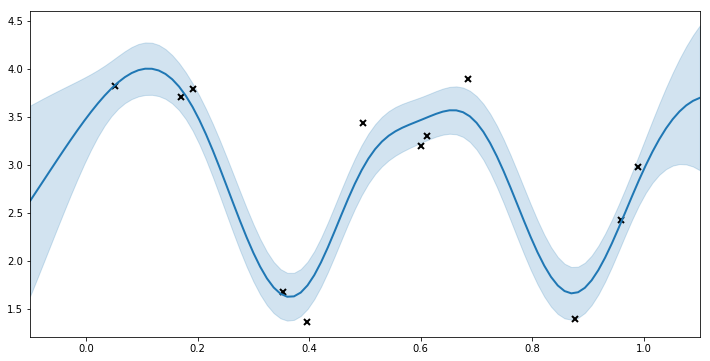

In [8]:
def plot(m):
    xx = np.linspace(-0.1, 1.1, 100).reshape(100, 1)
    mean, var = m.predict_y(xx)
    plt.figure(figsize=(12, 6))
    plt.plot(X, Y, 'kx', mew=2)
    plt.plot(xx, mean, 'C0', lw=2)
    plt.fill_between(xx[:, 0],
                     mean[:, 0] - 2*np.sqrt(var[:, 0]),
                     mean[:, 0] + 2*np.sqrt(var[:, 0]),
                     color='C0', alpha=0.2)
    plt.xlim(-0.1, 1.1)
    
plot(m)